# 主題：房貸客戶特徵與貸款相關變數分析
資料來源：金融：房屋貸款批准預測數據

探討影響金融機構在房屋貸款批准預測中的客戶特徵和相關變數。

In [19]:
using Pkg
using CSV
using DataFrames

In [2]:
#讀檔
csv_reader = CSV.File("C:/Users/User/Desktop/Finance Loan approval Prediction Data.csv")

614-element CSV.File:
 CSV.Row: (Loan_ID = String15("LP001002"), Gender = String7("Male"), Married = String3("No"), Dependents = String3("0"), Education = String15("Graduate"), Self_Employed = String3("No"), ApplicantIncome = 5849, CoapplicantIncome = 0.0, LoanAmount = missing, Loan_Amount_Term = 360, Credit_History = 1, Property_Area = String15("Urban"), Loan_Status = String1("Y"))
 CSV.Row: (Loan_ID = String15("LP001003"), Gender = String7("Male"), Married = String3("Yes"), Dependents = String3("1"), Education = String15("Graduate"), Self_Employed = String3("No"), ApplicantIncome = 4583, CoapplicantIncome = 1508.0, LoanAmount = 128, Loan_Amount_Term = 360, Credit_History = 1, Property_Area = String15("Rural"), Loan_Status = String1("N"))
 CSV.Row: (Loan_ID = String15("LP001005"), Gender = String7("Male"), Married = String3("Yes"), Dependents = String3("0"), Education = String15("Graduate"), Self_Employed = String3("Yes"), ApplicantIncome = 3000, CoapplicantIncome = 0.0, LoanAmount = 

In [3]:
#轉換為DataFrame
df = DataFrame(csv_reader)

Row,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,String15,String7?,String3?,String3?,String15,String3?,Int64,Float64,Int64?,Int64?,Int64?,String15,String1
1,LP001002,Male,No,0,Graduate,No,5849,0.0,missing,360,1,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
3,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
4,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
5,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
6,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
7,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,1,Urban,Y
8,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360,0,Semiurban,N
9,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360,1,Urban,Y


In [4]:
#敘述統計量:列出變數類型、最大最小值、平均值等
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,Loan_ID,,LP001002,,LP002990,0,String15
2,Gender,,Female,,Male,13,"Union{Missing, String7}"
3,Married,,No,,Yes,3,"Union{Missing, String3}"
4,Dependents,,0,,3+,15,"Union{Missing, String3}"
5,Education,,Graduate,,Not Graduate,0,String15
6,Self_Employed,,No,,Yes,32,"Union{Missing, String3}"
7,ApplicantIncome,5403.46,150,3812.5,81000,0,Int64
8,CoapplicantIncome,1621.25,0.0,1188.5,41667.0,0,Float64
9,LoanAmount,146.412,9,128.0,700,22,"Union{Missing, Int64}"


In [10]:
#Married摘要表
gdf = groupby(df, :Married)#暫存分組
gdf_summary = combine(gdf, nrow)#計算分組

Row,Married,nrow
,String3?,Int64
1,No,213
2,Yes,398
3,missing,3


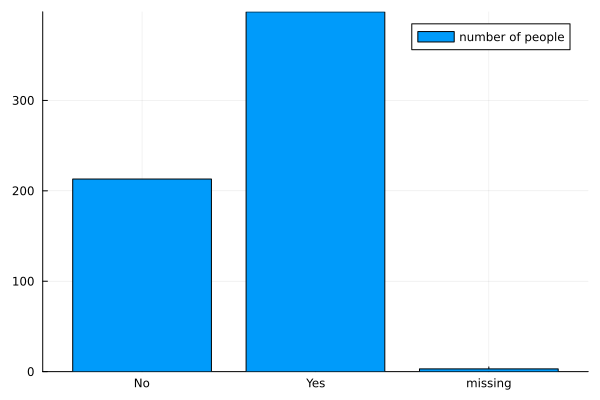

In [9]:
#繪製長條圖
using StatsPlots
bar(gdf_summary[!, :nrow], xticks=(1:3, gdf_summary[!, :Married]),labels="number of people")

(1) 類別變數 - 婚姻狀況 (Marital)
由摘要表可知，未婚（No）的客戶數量為213人，已婚（Yes）的客戶數量為398人，而有3個案例的婚姻狀況為缺失（missing）。

透過長條圖將清晰顯示不同婚姻狀況的數量分布，有助於視覺化理解。

可以此推測房貸客戶近多數為已婚人士，已婚人士可能需要考慮與家庭收入和支出相關的因素，而未婚客戶可能需要考慮個人信用狀況等因素。

總而言之，了解樣本中婚姻狀況的情況，金融機構可以更好地了解其客戶結構，以便在貸款批准預測模型中考慮適當的特徵。在後續的分析中，可以深入研究不同婚姻狀況下的貸款批准率。

In [11]:
#ApplicantIncome次數分配表
using CategoricalArrays
using Statistics
ApplicantIncome_edge = 100:100:90000 #最小值、區間、最大值
df.ApplicantIncome_bin = cut(df[!,:ApplicantIncome], ApplicantIncome_edge)
combine(groupby(df, :ApplicantIncome_bin), nrow)

Row,ApplicantIncome_bin,nrow
,Cat…,Int64
1,"[100, 200)",1
2,"[200, 300)",1
3,"[400, 500)",1
4,"[600, 700)",2
5,"[1000, 1100)",3
6,"[1200, 1300)",1
7,"[1300, 1400)",1
8,"[1400, 1500)",1
9,"[1500, 1600)",2


In [13]:
#LoanAmount次數分配表
using CategoricalArrays
using Statistics
LoanAmount_edge = 0:10:800 #最小值、區間、最大值
df.LoanAmount_bin = cut(df[!,:LoanAmount], LoanAmount_edge)
combine(groupby(df, :LoanAmount_bin), nrow)

Row,LoanAmount_bin,nrow
,Cat…?,Int64
1,missing,22
2,"[0, 10)",1
3,"[10, 20)",1
4,"[20, 30)",3
5,"[30, 40)",4
6,"[40, 50)",10
7,"[50, 60)",14
8,"[60, 70)",15
9,"[70, 80)",24


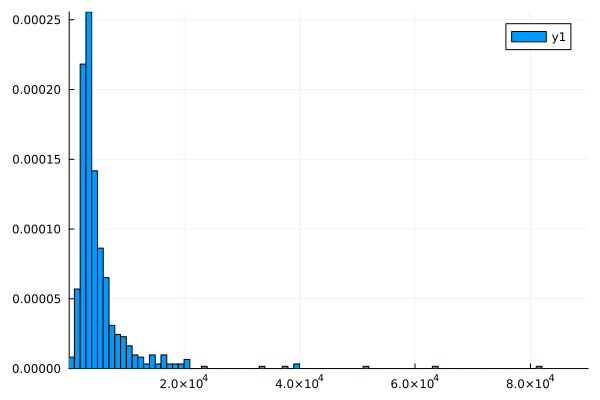

In [14]:
#繪製ApplicantIncome直方圖
using Plots
b_range = range(100, 90000, length=50)
histogram(df[!,:ApplicantIncome],ApplicantIncome_bins=b_range)
histogram(df[!,:ApplicantIncome],ApplicantIncome=b_range, normalize=:pdf)
xlims!(100, 90000)

(2) 數值變數1 - 收入 (ApplicantIncome)
次數分配表和直方圖：
更清晰地顯示不同收入區間中客戶的數量，方便理解收入分布的主要趨勢和集中區域。

1. 集中區域:[2000, 3000)、[3000, 4000)等區間的客戶數量相對較多
   表示金融房屋貸款客戶在收入上可能存在某些特定的集中區域，因此對於房貸方案可主要以這部分為主要客群。在這些區域，可能需要進一步分析客戶的其他特徵，例如婚姻狀況、信用記錄等，以更好地理解這些客戶群體的特性。

2. 低收入區域：[100, 200)，[200, 300)，[400, 500）客戶數量較少
   可能表示這些區域的人群可能不太符合貸款需求，或者金融機構在這些區域有不同的策略。

3. 高收入區域：
   [63300, 63400)，[81000, 81100)客戶數量也較少
   可能表示高收入人群可能有其他金融需求，或者這些區域屬於較為罕見的收入水平。可能是一些高淨值客戶，金融機構可能需要考慮提供更個性化的貸款產品，以滿足這些客戶的獨特需求。

總的來說，通過分析收入分布，可以提供有關金融房屋貸款客戶收入情況的深入洞察，有助於金融機構優化其貸款產品和批准策略，以更好地滿足不同收入層次客戶的需求。

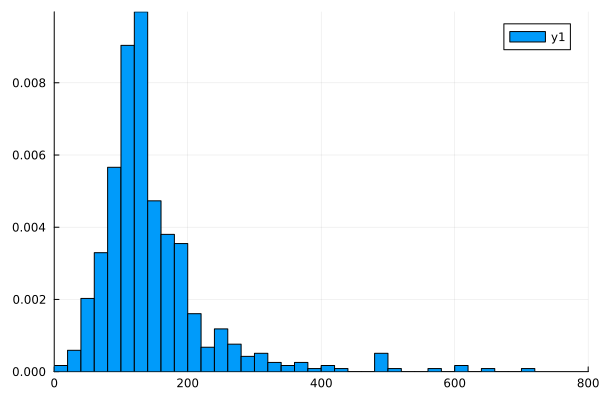

In [15]:
#繪製LoanAmount直方圖
using Plots
b_range = range(0, 800, length=10)
histogram(df[!,:LoanAmount],LoanAmount_bins=b_range)
histogram(df[!,:LoanAmount],LoanAmount_bins=b_range, normalize=:pdf)
xlims!(0, 800)

(2) 數值變數2 - 貸款金額 (LoanAmount) 次數分配表和直方圖： 更清晰地顯示不同貸款金額區間中客戶的數量，可以觀察到是否存在某些區間的集中趨勢，這可能反映了金融機構的貸款策略。

1. [100 , 120)到[120, 140)之間的區間分析：
   在這範圍內，貸款金額似乎集中較多的客戶。 這可能表示金融機構在這些金額範圍內有更多的業務活動，或者這是客戶需求的集中區域。

2. [0, 10)到[70, 80)之間的區間分析：
   這些區間內的貸款金額相對較少，可能包含一些較小的或初次購屋者的貸款。
   
3. [300, 400)到[700, 710)之間的高金額區間：
  在這些高金額區間內，貸款金額相對較少。 這可能表示較高金額的貸款情況相對較少，或這些情況較為獨特，需要進一步調查。

貸款金額的數量逐漸減少，呈現長尾分佈。透過此可以幫助金融機構理解客戶的貸款需求，並可能調整其貸款產品和策略，以更好地滿足不同貸款金額範圍的客戶需求。

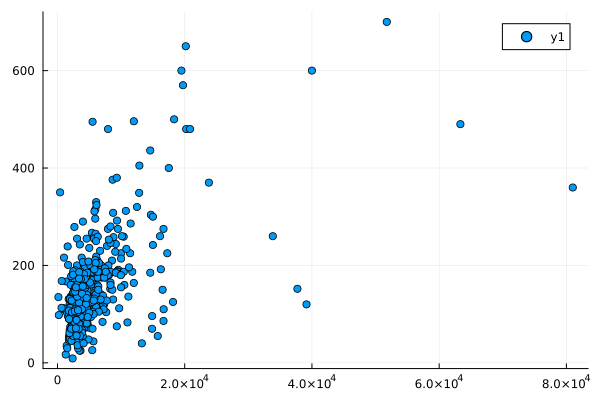

In [16]:
#繪製ApplicantIncome與LoanAmount散布圖
using StatsPlots
scatter(df[!,:ApplicantIncome], df[!,:LoanAmount])

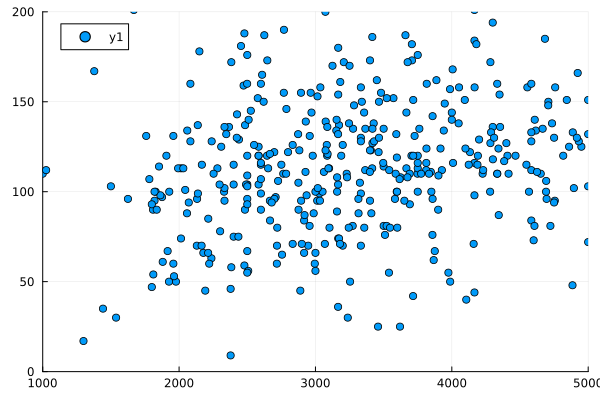

In [22]:
scatter(df[!,:ApplicantIncome], df[!,:LoanAmount])
xlims!(1000, 5000)
ylims!(0, 200)

(3) 數值變數的散布圖 - 收入與貸款金額散布圖：收入將位於橫軸，貸款金額將位於縱軸，每個點代表一個客戶。這樣的圖形有助於可視化這兩個變數之間的任何趨勢或模式。

我們又可結合前面兩變數的次數分配表和直方圖的結果，縮小範圍觀測收入與貸款金額關係，表示兩者為正相關，且房貸客戶收入集中[2000, 3000)、[3000, 4000)區間，貸款金額[100 , 120)到[120, 140)，金融機構可由此推出更多針對性的方案。

(4)可回答，但不夠完整，需要結合更多數據的分析。

主題：房貸客戶特徵與貸款相關變數分析
探討影響金融機構在房屋貸款批准預測中的客戶特徵和相關變數。

基於以上觀察，金融機構可以：

1. 定位目標客戶：將目標客戶定位在收入[2000, 4000)區間的人群，這是貸款需求較大的潛在客戶群體。

2. 調整貸款產品：根據貸款金額分布，金融機構可以調整其貸款產品，以滿足[100, 140)的區間內的貸款需求。這可能包括提供適應不同金額的貸款產品。

3. 考慮婚姻狀況等變數：金融機構可以進一步分析這些變數對收入和貸款金額之間關係的影響，並相應地調整其貸款策略。

4. 提供定制化產品：基於這些區間的客戶需求，金融機構可以開發定制化的貸款產品，以更好地滿足這一群體的特殊需求。

總的來說，這樣的分析結果可以幫助金融機構更精確地理解他們的目標客戶，並針對這些客戶提供更有效的金融產品和服務。